# Predict california housing prices with TensorFlow

In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing=fetch_california_housing()

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Exploratory Data Analysis(EDA)

In [5]:
features= pd.DataFrame(housing.data, columns=housing.feature_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
target=pd.Series(housing.target)
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
#split data set
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train, x_valid, y_train, y_valid=train_test_split(x_train_full, y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [10]:
#we set the random seeds, this is to generate the same result every time we run this model
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
x_train.shape

(11610, 8)

In [12]:
#Building the model
model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
                               keras.layers.Dense(30,activation='relu'),
                               keras.layers.Dense(1)
    
])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae']
             )

/opt/anaconda3/envs/TestEnv/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

2022-04-05 09:46:33.551379: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
363/363 [==============================] - 4s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [16]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 873us/step - loss: 0.3942 - mae: 0.4502


In [17]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.593418538570404,
  0.5557191371917725,
  0.5271904468536377,
  0.5032976269721985,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068865299225,
  0.4039529263973236,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563371658325,
  0.5010154247283936,
  0.492448091506958,
  0.4857262372970581,
  0.4797375798225403,
  0.4744162857532501,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.4612663984298706,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083141326904297],
 'val_loss': [0.7126054167747498,
  0.6880089044570923,
  0.5803284645080566,
  0.516608476638

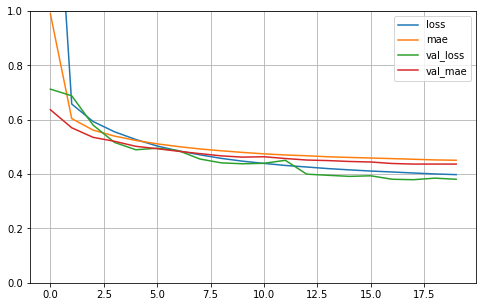

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [19]:
x_new=x_test[:3]
y_pred=model.predict(x_new)
print(y_pred)

[[0.53287673]
 [1.8915398 ]
 [3.404087  ]]


In [20]:
del model

In [21]:
keras.backend.clear_session()